In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [399]:
data_events = pd.read_csv('holidays_events.csv')
data_oil = pd.read_csv('oil.csv')
data_stores = pd.read_csv('stores.csv')
data_trans = pd.read_csv('transactions.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [400]:
data_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [401]:
data_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [402]:
data_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [403]:
data_trans

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [404]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [405]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

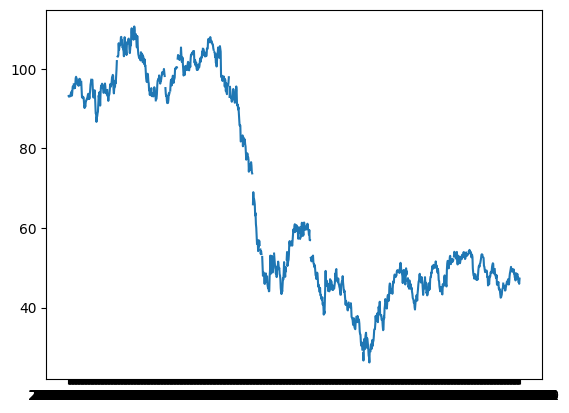

In [406]:
def DrawLine(X_data, Y_data):
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(X_data, Y_data)
    plt.show()
DrawLine(data_oil['date'], data_oil['dcoilwtico'])


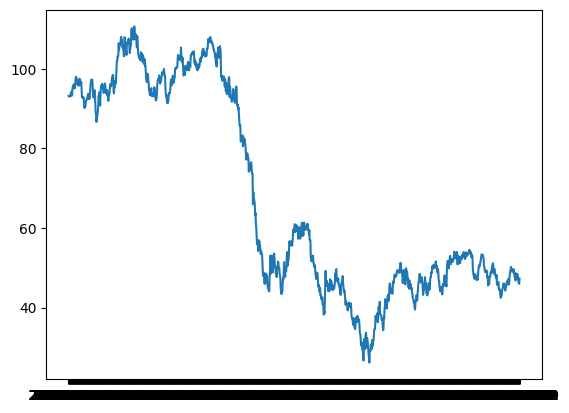

In [407]:
#补缺失值
data_oil_withoutNA = data_oil.fillna(method="pad")
DrawLine(data_oil_withoutNA['date'], data_oil_withoutNA['dcoilwtico'])

In [408]:
# 将日期列转换为 datetime 格式
data_oil['date'] = pd.to_datetime(data_oil['date'])
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
data_trans['date'] = pd.to_datetime(data_trans['date'])
data_events['date'] = pd.to_datetime(data_events['date'])

# 合并油价数据
train = pd.merge(train, data_oil, on='date', how='left')
test = pd.merge(test, data_oil, on='date', how='left')

# 合并商店信息
train = pd.merge(train, data_stores, on='store_nbr', how='left')
test = pd.merge(test, data_stores, on='store_nbr', how='left')

# 合并交易信息
train['store_nbr'] = train['store_nbr'].astype(int)
data_trans['store_nbr'] = data_trans['store_nbr'].astype(int)

train = pd.merge(train, data_trans[['date', 'store_nbr', 'transactions']], on=['date', 'store_nbr'], how='left')
test = pd.merge(test, data_trans[['date', 'store_nbr', 'transactions']], on=['date', 'store_nbr'], how='left')

# 合并节假日信息
data_events['is_holiday'] = (data_events['type'] == 'Holiday').astype(int)

train = pd.merge(train, data_events[['date', 'is_holiday']], on='date', how='left')
test = pd.merge(test, data_events[['date', 'is_holiday']], on='date', how='left')


In [409]:
# 补缺失值
train['dcoilwtico'].fillna(0, inplace=True)
train['transactions'].fillna(0, inplace=True)
train['is_holiday'].fillna(0, inplace=True)
test['dcoilwtico'].fillna(0, inplace=True)
test['transactions'].fillna(0, inplace=True)
test['is_holiday'].fillna(0, inplace=True)


In [410]:
# 标签编码
label = LabelEncoder()
train['type'] = label.fit_transform(train['type'])
test['type'] = label.transform(test['type'])

In [411]:
# 特征选择
features = ['store_nbr', 'onpromotion', 'dcoilwtico', 'type', 'cluster', 'transactions', 'is_holiday']
X_train = train[features]
y_train = train['sales']

XGBoost

In [412]:
#训练XGBoost模型
model = XGBRegressor(objective='reg:squaredlogerror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:squaredlogerror', ...)

In [413]:
X_test = test[features]
train_predictions = model.predict(X_train)

In [414]:
# 计算均方误差
mse = mean_squared_error(y_train, train_predictions)
print(f"Training MSE: {mse:.2f}")

Training MSE: 1164255.47


In [415]:
predictions_xgb = model.predict(X_test)

In [417]:
submission = pd.DataFrame({'id': test['id'],'sales':predictions_xgb})
submission.to_csv('submission_xgb.csv',index=False)

随机森林

In [420]:
rf_model = RandomForestRegressor(n_estimators=25, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=42)

In [421]:
X_test_rf = test[features]
train_predictions_rf = rf_model.predict(X_train)

In [422]:
# 计算均方误差
mse_rf = mean_squared_error(y_train, train_predictions_rf)
print(f"Training Mean Squared Error: {mse_rf:.2f}")

Training Mean Squared Error: 407224.88


In [423]:
predictions_rf = rf_model.predict(X_test)

In [424]:
submission = pd.DataFrame({'id': test['id'],'sales':predictions_rf})
submission.to_csv('submission_rf.csv',index=False)